In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
# getting dummy integer values in place of object values of geography and gender values
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True) 

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])   #taking inputs
y = df['Exited'].values           #output

from sklearn.model_selection import train_test_split

#splitting training and testing data in 80% and 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)   #scaling the data
X_test_trf = scaler.transform(X_test)

In [12]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [14]:
#designing model
model = Sequential()     

model.add(Dense(11,activation='relu',input_dim=11))   #input layer with 11 input dimensions
model.add(Dense(11,activation='relu'))              #1st hidden layer
model.add(Dense(1,activation='sigmoid'))               #output layer

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [16]:
#compiling model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#train the model with training data
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.6641 - val_loss: 0.5315 - val_accuracy: 0.7894
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7977 - val_loss: 0.4799 - val_accuracy: 0.8000
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.8025 - val_loss: 0.4550 - val_accuracy: 0.8019
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8075 - val_loss: 0.4421 - val_accuracy: 0.8037
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8119 - val_loss: 0.4340 - val_accuracy: 0.8087
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8177 - val_loss: 0.4283 - val_accuracy: 0.8125
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8197 - val_loss: 0.4235 - val_accuracy: 0.8163

In [18]:
#get the prediction for the test data
y_pred = model.predict(X_test_trf)

In [19]:
y_pred

array([[0.21371096],
       [0.27905884],
       [0.10922047],
       ...,
       [0.17115593],
       [0.2630121 ],
       [0.20750931]], dtype=float32)

In [20]:
#showing the 2nd layer weights and bias of the model
model.layers[1].get_weights()

[array([[-0.4019992 ,  0.4726981 , -0.07185597,  0.63109785, -0.36781135,
          0.07604662,  0.38202816,  0.03766243, -0.71254355,  0.27916735,
         -1.4393101 ],
        [ 0.3239763 ,  0.29309538,  0.14992194,  0.49676841, -0.3070392 ,
          0.34428376, -0.13342407, -0.06513162, -0.44198698, -0.06883445,
          0.47764444],
        [-0.36338067,  0.33481842,  0.26903793,  0.2328168 , -0.29647738,
         -0.08549057,  0.5911403 , -0.95280945, -0.63498455,  0.2661914 ,
          0.11746721],
        [ 0.7996398 ,  0.44081464,  0.621947  ,  0.23112969,  0.04932995,
          0.34077224,  0.7697783 ,  0.33132827,  0.533881  ,  0.08247615,
          0.04291429],
        [ 0.08286686,  0.08489573, -0.7201747 , -0.40593424,  0.24109274,
         -0.21141875,  0.23259354, -0.35583338, -0.3956856 ,  0.3020971 ,
          0.02313172],
        [-0.8328616 , -1.2012979 , -0.36903766, -0.98229474, -0.90585136,
         -0.12554653, -0.66688436, -0.24568605, -0.84976506, -0.8093022

In [21]:
y_pred = y_pred.argmax(axis=-1)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
#checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

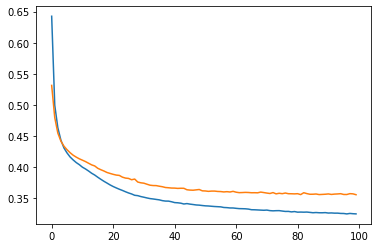

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

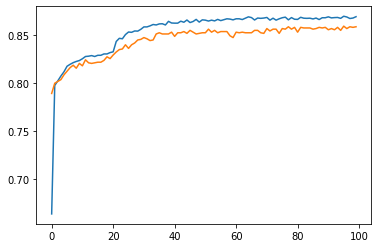

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])